In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import random
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
class GeneticAlgorithm:

    def __init__(
        self,
        pop_size,
        n_generations,
        mutation_rate,
        k_range,
        ):
        self.pop_size = pop_size
        self.n_generations = n_generations
        self.mutation_rate = mutation_rate
        self.k_range = k_range
        self.n_bits = int(np.ceil(np.log2(self.k_range + 1)))  # Number of bits needed to represent k_range
        self.best_solution = None
        self.best_fitness = None

    def create_initial_population(self):

        # Create an initial population of binary strings representing k

        population = []
        for i in range(self.pop_size):
            chromosome = np.random.randint(2, size=self.n_bits)
            population.append(chromosome)
        return population

    def evaluate_fitness(self, chromosome):
        # Derive the value of k from the binary chromosome
        k = max(1, int(''.join(map(str, chromosome)), 2))

        # Create a k-NN classifier with the derived k value
        knn = KNeighborsClassifier(n_neighbors=k)

        # Evaluate the fitness of the k-NN classifier
        knn.fit(X_train, y_train.values.ravel())
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy

    def roulette_wheel_selection(self, population):

        # Calculate the fitness of each candidate solution

        fitness_values = [self.evaluate_fitness(candidate)
                          for candidate in population]

        # Calculate the total fitness of the population

        total_fitness = sum(fitness_values)

        # Calculate the selection probabilities of each candidate solution

        selection_probabilities = [fitness_value / total_fitness
                                   for fitness_value in fitness_values]

        # Select a candidate solution based on its selection probability

        selected_index = -1
        r = random.random()
        while r > 0:
            r -= selection_probabilities[selected_index]
            selected_index += 1

        return population[selected_index]

    def mutate(self, chromosome):

        # Flip one random bit of the chromosome

        mutated_chromosome = chromosome.copy()
        random_index = np.random.randint(self.n_bits)
        mutated_chromosome[random_index] = 1 - mutated_chromosome[random_index]
        return mutated_chromosome

    def crossover(self, parent1, parent2):

        # Perform single-point crossover between two parent chromosomes

        crossover_point = random.randint(1, self.n_bits - 1)
        child1 = np.concatenate((parent1[:crossover_point],
                                parent2[crossover_point:]))
        child2 = np.concatenate((parent2[:crossover_point],
                                parent1[crossover_point:]))
        return (child1, child2)

    def run(self):

        # Run the genetic algorithm to optimize the hyperparameters

        population = self.create_initial_population()
        for i in range(self.n_generations):

            # Evaluate the fitness of each candidate solution

            fitness_values = [self.evaluate_fitness(chromosome)
                              for chromosome in population]

            # Select the best candidate solution

            best_index = np.argmax(fitness_values)
            best_chromosome = population[best_index]
            best_fitness = fitness_values[best_index]

            # Update the best solution and best fitness seen so far

            if self.best_fitness is None or best_fitness > self.best_fitness:
                self.best_solution = best_chromosome
                self.best_fitness = best_fitness

            # Create a new population by performing roulette_wheel_selection, mutation, and crossover

            new_population = [best_chromosome] # Include the best solution in the new population 
            for j in range(1, self.pop_size):

                # Perform roulette wheel selection to choose two parents

                parent1 = self.roulette_wheel_selection(population)
                parent2 = self.roulette_wheel_selection(population)

                # Perform crossover to generate two new candidate solutions

                (child1, child2) = self.crossover(parent1, parent2)

                # Perform mutation on the new candidate solutions

                if random.random() < self.mutation_rate:
                    child1 = self.mutate(child1)
                if random.random() < self.mutation_rate:
                    child2 = self.mutate(child2)

                # Add the new candidate solutions to the new population

                new_population.append(child1)
                new_population.append(child2)

            # Replace the old population with the new population

            population = new_population
        # Return the best solution seen during the optimization process

        return self.best_solution


In [5]:
data=pd.read_csv("breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data=data.drop(["Unnamed: 32","id"],axis=1)

In [8]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
data["diagnosis"]=data["diagnosis"].map({'B':0,'M':1}).astype(int)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
corr=data.corr()
corr.nlargest(30,'diagnosis')['diagnosis']

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [12]:
x=data[['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean','radius_se','perimeter_se', 'area_se','compactness_se', 'concave points_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','texture_worst','area_worst']]
y=data[['diagnosis']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 16)
(171, 16)
(398, 1)
(171, 1)


In [15]:
# Define the genetic algorithm parameters
pop_size = 50
n_generations = 100
mutation_rate = 0.001
k_range = 31
# Instantiate the genetic algorithm class
ga = GeneticAlgorithm(pop_size, n_generations, mutation_rate, k_range)

In [16]:
# Run the genetic algorithm to optimize the hyperparameters of the k-NN classifier
best_chromosome = ga.run()

# Derive the value of k from the binary chromosome
best_k = max(1, int(''.join(map(str, best_chromosome)), 2))

# Create the best k-NN classifier with the derived k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Fit the best k-NN classifier on the training data
best_knn.fit(X_train, y_train.values.ravel())

# Evaluate the accuracy of the best k-NN classifier on the testing data
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the best value of k and the accuracy achieved by the best k-NN classifier
print("Best k:", best_k)
print("Accuracy:", accuracy)

Best k: 5
Accuracy: 0.935672514619883


In [20]:
cm = confusion_matrix(y_test, y_pred)

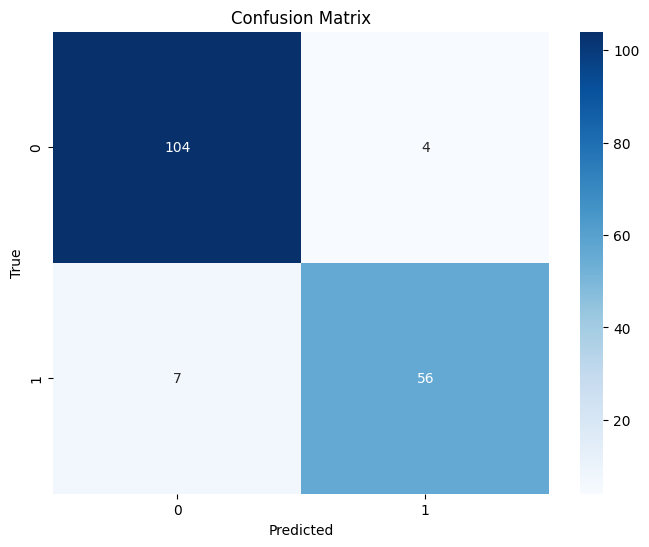

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       108
           1       0.93      0.89      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [17]:
import joblib
# Save the model to disk
joblib.dump(best_knn, 'best_knn_model_breast.joblib')

['best_knn_model_breast.joblib']

In [29]:
loaded_model = joblib.load('best_knn_model_breast.joblib')
new_data = pd.DataFrame({
    'radius_mean': [15.2, 12.7, 14.5, 13.1],
    'perimeter_mean': [102.5, 98.3, 105.7, 99.8],
    'area_mean': [725.2, 601.7, 784.5, 678.9],
    'compactness_mean': [0.123, 0.085, 0.102, 0.094],
    'concave points_mean': [0.032, 0.025, 0.029, 0.027],
    'radius_se': [0.534, 0.432, 0.489, 0.475],
    'perimeter_se': [2.567, 2.123, 2.345, 2.234],
    'area_se': [24.1, 20.3, 26.7, 22.8],
    'compactness_se': [0.013, 0.009, 0.011, 0.010],
    'concave points_se': [0.011, 0.008, 0.010, 0.009],
    'radius_worst': [16.8, 14.2, 16.1, 14.8],
    'perimeter_worst': [116.6, 109.1, 118.4, 110.9],
    'compactness_worst': [0.189, 0.147, 0.165, 0.158],
    'concave points_worst': [0.071, 0.059, 0.066, 0.063],
    'texture_worst': [22.5, 19.8, 21.3, 20.1],
    'area_worst': [985.1, 868.3, 1012.9, 925.2]
})
predictions = loaded_model.predict(new_data)
print(predictions)

[1 0 1 1]
